In [96]:
import torch
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms

In [97]:
def process_image(image):
    ''' Scales, crops, and normalizes a PIL image for a PyTorch model,
        returns an Numpy array
    '''

    # TODO: Process a PIL image for use in a PyTorch model
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    size = 256, 256
    print("mean shape: ", mean.shape)
    with Image.open(image) as im:


        print('flowers/train/1/image_06734.jpg',im)

        im.thumbnail(size)

        width, height = im.size

        if width < height:
            im = im.resize((256, int(height * (256 / width))))
        else:
            im = im.resize((int(width * (256 / height)), 256))

        left = (width - 224) / 2
        top = (height - 224) / 2
        right = (width + 224) / 2
        bottom = (height + 224) / 2

        cropped_im = im.crop((left, top, right, bottom))
        #cropped_im.show()
        np_image = np.array(cropped_im)
        print(np_image.shape)
        #we are looping through this image 3 times because there is 3 color chanel
        """for i in range(3):
            print("color channel:", np_image[1, 1, i])
            np_image[:, :, i] = (np_image[:, :, i] - mean[i]) / std[i]
            print("After color channel:", np_image[1, 1, i])"""

        #np_image = np_image - mean / std

        #we are converting this back to torch tensor because the model is expecting a torch tensor as well as transposing the the color channel

        np_image = torch.from_numpy(np_image)

        np_image = np_image.permute(2, 0, 1)

        print("Color channel", np_image[1,1,1])

        transform = transforms.Normalize(mean, std)
        image = transform(np_image.float())
        print("Color channel", np_image[1,1,1])


        print(np_image.shape)


    return np_image


In [98]:

def imshow(image, ax=None, title=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    print("Image type:",type(image))
    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    image = image.numpy().transpose((1, 2, 0))

    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean

    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    image = np.clip(image, 0, 1)

    ax.imshow(image)

    return ax


mean shape:  (3,)
flowers/train/1/image_06734.jpg <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=523x500 at 0x7C787E0C5350>
(224, 224, 3)
Color channel tensor(37, dtype=torch.uint8)
Color channel tensor(37, dtype=torch.uint8)
torch.Size([3, 224, 224])
Image type: <class 'str'>


AttributeError: 'str' object has no attribute 'numpy'

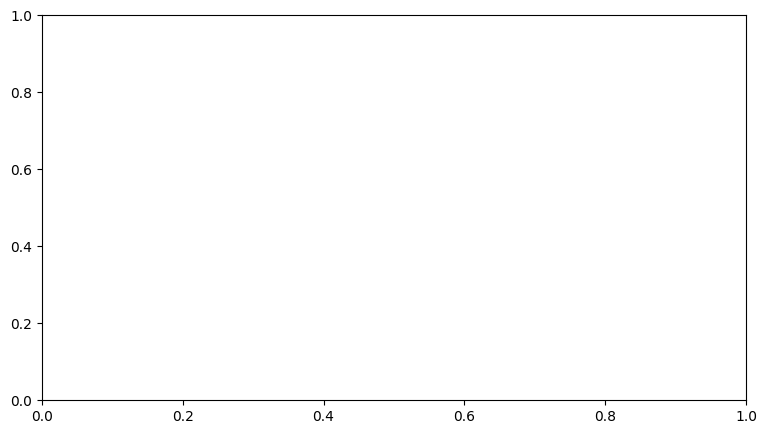

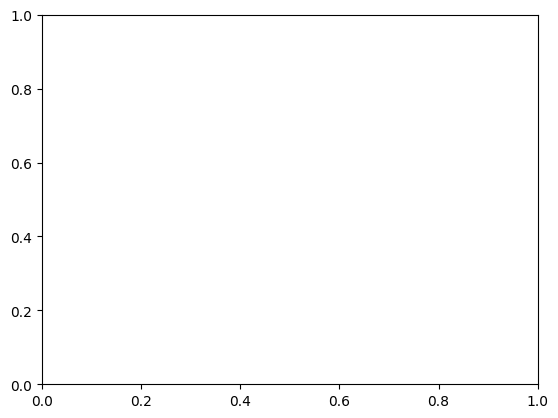

In [100]:

image = process_image('flowers/train/1/image_06734.jpg')

plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)
imshow('flowers/train/1/image_06734.jpg')

plt.subplot(1, 2, 2)
image.imshow()
